## <center>Підготовка та аналіз даних</center>
## <center>Лабораторна робота №4 (1 частина)</center>
#### <center>ФБ-25 Заєць Микола</center>

Завантажуємо потрібні нам бібліотеки

In [75]:
import numpy as np
import pandas as pd
import timeit
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
def avg_time(func, num_iterations=10):
    time_taken = timeit.timeit(stmt=func, globals=globals(), number=num_iterations)
    average_time = time_taken / num_iterations
    return average_time

list_time_pd = []
list_time_np = []

Прочитали імена стовпців з файлу, для подальшого використання

In [77]:
file_name = r'Datasets\household_power_consumption.txt'
with open(file_name, 'r') as file:
    first_line = file.readline()
    #print(first_line)
headers = first_line.rstrip('\n').split(";")
print(headers)

['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


# Pandas
Формуємо датафрейм з даних

In [78]:
def readfile(file, header):
    df_fun = pd.read_csv(file, sep=";", header=1, names=header, na_values=['?'])
    return df_fun

pd_time = avg_time('readfile(file_name, headers)')
list_time_pd.append(pd_time)
print(f'Середній час Pandas для зчитування файлу: {pd_time}')

df = readfile(file_name, headers)
df

Pandas readfile time: 1.7563134100000752


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
1,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
3,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
4,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
...,...,...,...,...,...,...,...,...,...
2075253,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075254,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075255,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075256,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


# Numpy

In [79]:
def readfile_np(file, header):
    array = np.genfromtxt(file, delimiter=';', dtype=None, names=header, encoding=None, skip_header=1)
    return array

np_time = avg_time('readfile_np(file_name, headers)')
list_time_np.append(np_time)        
print(f'Середній час Numpy для зчитування файлу: {np_time}')

data_array = readfile_np(file_name, headers)
data_array

Pandas readfile time: 18.397858110000016


array([('16/12/2006', '17:24:00', '4.216', '0.418', '234.840', '18.400', '0.000', '1.000', 17.),
       ('16/12/2006', '17:25:00', '5.360', '0.436', '233.630', '23.000', '0.000', '1.000', 16.),
       ('16/12/2006', '17:26:00', '5.374', '0.498', '233.290', '23.000', '0.000', '2.000', 17.),
       ...,
       ('26/11/2010', '21:00:00', '0.938', '0.000', '239.820', '3.800', '0.000', '0.000',  0.),
       ('26/11/2010', '21:01:00', '0.934', '0.000', '239.700', '3.800', '0.000', '0.000',  0.),
       ('26/11/2010', '21:02:00', '0.932', '0.000', '239.550', '3.800', '0.000', '0.000',  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<U6'), ('Global_reactive_power', '<U5'), ('Voltage', '<U7'), ('Global_intensity', '<U6'), ('Sub_metering_1', '<U6'), ('Sub_metering_2', '<U6'), ('Sub_metering_3', '<f8')])

# Pandas

In [80]:
df = df.dropna()

if df.isna().any().any() or (df == '?').any().any():
    print("Є пусті значення у датафреймі")
else:
    print("Немає пустих значень у датафреймі")

There are no empty values in the dataframe


# Numpy

In [81]:
string_data_array = np.array([tuple(str(item) for item in row) for row in data_array])
mask = np.all((string_data_array != '?') & (string_data_array != 'nan'), axis=1)
cleaned_data_array = string_data_array[mask]
if np.any(cleaned_data_array == '?'):
    print("Є пусті значення у датафреймі")
else:
    print("Немає пустих значень у датафреймі")

There are no empty values in the array


In [82]:
dtype = [('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<U6'), ('Global_reactive_power', '<U5'), ('Voltage', '<U7'), ('Global_intensity', '<U6'), ('Sub_metering_1', '<U6'), ('Sub_metering_2', '<U6'), ('Sub_metering_3', '<f8')]

structured_array = np.array([tuple(row) for row in cleaned_data_array], dtype=dtype)

# Pandas
## Завдання 1
Обрати всі домогосподарства, у яких загальна активна споживана 
потужність перевищує 5 кВт.

In [83]:
def select_households(df):
    return df[df['Global_active_power'] > 5]

pd_time = avg_time('select_households(df)')
list_time_pd.append(pd_time)
print(f'Середній час Pandas для вибірки: {pd_time}')

df_households = select_households(df) 
df_households

Pandas readfile time: 0.007005500000013853


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
1,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
10,16/12/2006,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
11,16/12/2006,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...
2069355,22/11/2010,18:40:00,5.408,0.150,231.50,23.6,48.0,0.0,0.0
2069356,22/11/2010,18:41:00,5.528,0.144,232.48,24.6,53.0,0.0,0.0
2071585,24/11/2010,07:50:00,5.172,0.050,235.18,22.0,0.0,38.0,17.0
2071586,24/11/2010,07:51:00,5.750,0.000,234.40,24.6,0.0,39.0,17.0


# Numpy

In [84]:
def select_households_np(array):
    mask = array['Global_active_power'].astype(float) > 5
    selected_rows = array[mask]
    return selected_rows

np_time = avg_time('select_households_np(structured_array)')
list_time_np.append(np_time)        
print(f'Середній час Numpy для вибірки: {np_time}')

array_households = select_households_np(structured_array)
print(array_households)

Pandas readfile time: 0.8581627400000797
[('16/12/2006', '17:25:00', '5.360', '0.436', '233.630', '23.000', '0.000', '1.000', 16.)
 ('16/12/2006', '17:26:00', '5.374', '0.498', '233.290', '23.000', '0.000', '2.000', 17.)
 ('16/12/2006', '17:27:00', '5.388', '0.502', '233.740', '23.000', '0.000', '1.000', 17.)
 ...
 ('24/11/2010', '07:50:00', '5.172', '0.050', '235.180', '22.000', '0.000', '38.000', 17.)
 ('24/11/2010', '07:51:00', '5.750', '0.000', '234.400', '24.600', '0.000', '39.000', 17.)
 ('25/11/2010', '07:21:00', '5.074', '0.240', '238.550', '21.400', '1.000', '2.000', 18.)]


# Pandas
## Завдання 2
Обрати всі домогосподарства, у яких вольтаж перевищує 235 В.

In [85]:
def households_volt(df):
    return df[df['Voltage'] > 235]

pd_time = avg_time('households_volt(df)')
list_time_pd.append(pd_time)
print(f'Середній час Pandas для вибірки: {pd_time}')

df_households = households_volt(df) 
df_households

Pandas readfile time: 0.10582790999997087


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
3,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
4,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
5,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
6,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
13,16/12/2006,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075253,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075254,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075255,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075256,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


# Numpy

In [86]:
def households_volt_np(array):
    mask = array['Voltage'].astype(float) > 235
    selected_rows = array[mask]
    return selected_rows

np_time = avg_time('households_volt_np(structured_array)')
list_time_np.append(np_time)        
print(f'Середній час Numpy для вибірки: {np_time}')

array_households = households_volt_np(structured_array)
print(array_households)

Pandas readfile time: 1.1979133500000898
[('16/12/2006', '17:28:00', '3.666', '0.528', '235.680', '15.800', '0.000', '1.000', 17.)
 ('16/12/2006', '17:29:00', '3.520', '0.522', '235.020', '15.000', '0.000', '2.000', 17.)
 ('16/12/2006', '17:30:00', '3.702', '0.520', '235.090', '15.800', '0.000', '1.000', 17.)
 ...
 ('26/11/2010', '21:00:00', '0.938', '0.000', '239.820', '3.800', '0.000', '0.000',  0.)
 ('26/11/2010', '21:01:00', '0.934', '0.000', '239.700', '3.800', '0.000', '0.000',  0.)
 ('26/11/2010', '21:02:00', '0.932', '0.000', '239.550', '3.800', '0.000', '0.000',  0.)]


# Pandas
## Завдання 3
Обрати всі домогосподарства, у яких сила струму лежить в межах 
19-20 А, для них виявити ті, у яких пральна машина та холодильних 
споживають більше, ніж бойлер та кондиціонер.

In [87]:
def households_appliances(df):
    df = df[df['Global_intensity'].between(19, 20)]
    return df[df[['Sub_metering_1', 'Sub_metering_2']].sum(axis=1) > df['Sub_metering_3']]

pd_time = avg_time('households_appliances(df)')
list_time_pd.append(pd_time)
print(f'Середній час Pandas для вибірки: {pd_time}')

df_intensity = households_appliances(df)
df_intensity

Pandas readfile time: 0.012950929999897198


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
44,16/12/2006,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
459,17/12/2006,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
463,17/12/2006,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
474,17/12/2006,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
475,17/12/2006,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...
2071588,24/11/2010,07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2071589,24/11/2010,07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2071590,24/11/2010,07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0
2071591,24/11/2010,07:56:00,4.536,0.000,237.03,19.0,0.0,39.0,17.0


# Numpy

In [91]:
def households_appliances_np(array):
    mask = (array['Global_intensity'].astype(float) >= 19.0) & (array['Global_intensity'].astype(float) <= 20.0) & ((array['Sub_metering_1'].astype(float) + array['Sub_metering_2'].astype(float)) > array['Sub_metering_3'].astype(float))
    selected_rows = array[mask]
    return selected_rows

np_time = avg_time('households_appliances_np(structured_array)')
list_time_np.append(np_time)        
print(f'Середній час Numpy для вибірки: {np_time}')

array_households = households_appliances_np(structured_array)
print(array_households)

Pandas readfile time: 3.4842101899999762
[('16/12/2006', '18:09:00', '4.464', '0.136', '234.660', '19.000', '0.000', '37.000', 16.)
 ('17/12/2006', '01:04:00', '4.582', '0.258', '238.080', '19.600', '0.000', '13.000',  0.)
 ('17/12/2006', '01:08:00', '4.618', '0.104', '239.610', '19.600', '0.000', '27.000',  0.)
 ...
 ('24/11/2010', '07:55:00', '4.602', '0.000', '237.080', '19.400', '0.000', '40.000', 17.)
 ('24/11/2010', '07:56:00', '4.536', '0.000', '237.030', '19.000', '0.000', '39.000', 17.)
 ('24/11/2010', '07:57:00', '4.626', '0.000', '236.780', '19.400', '0.000', '39.000', 17.)]


# Pandas
## Завдання 4
Обрати випадковим чином 500000 домогосподарств (без повторів 
елементів вибірки), для них обчислити середні величини усіх 3-х 
груп споживання електричної енергії, а також

In [92]:
def households_random(df):
    random_household = df.sample(n=500000, replace=False).sort_index()
    return random_household

pd_time = avg_time('households_random(df)')
list_time_pd.append(pd_time)
print(f'Середній час Pandas для випадкової вибірки: {pd_time}')

random_household = households_random(df)
random_household

Pandas readfile time: 0.30090163000004394


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
3,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
9,16/12/2006,17:34:00,4.448,0.498,232.86,19.6,0.0,1.0,17.0
12,16/12/2006,17:37:00,5.268,0.398,232.91,22.6,0.0,2.0,17.0
14,16/12/2006,17:39:00,3.384,0.282,237.14,14.2,0.0,0.0,17.0
15,16/12/2006,17:40:00,3.270,0.152,236.73,13.8,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...
2075237,26/11/2010,20:42:00,0.988,0.106,239.60,4.2,0.0,1.0,0.0
2075240,26/11/2010,20:45:00,0.972,0.092,238.32,4.0,0.0,2.0,0.0
2075245,26/11/2010,20:50:00,1.198,0.128,238.11,5.0,0.0,1.0,0.0
2075247,26/11/2010,20:52:00,0.946,0.000,239.05,4.0,0.0,0.0,0.0


# Numpy

In [93]:
def households_random_np(array):
    num_rows = array.shape[0]
    random_indices = np.random.choice(num_rows, size=500000, replace=False)
    random_rows = array[random_indices]
    return random_rows

np_time = avg_time('households_random_np(structured_array)')
list_time_np.append(np_time)        
print(f'Середній час Pandas для випадкової вибірки: {np_time}')

random_array = households_random_np(structured_array)
print(random_array)

Pandas readfile time: 0.23875579999985347
[('28/5/2009', '05:54:00', '0.252', '0.000', '233.360', '1.000', '0.000', '0.000',  1.)
 ('7/2/2009', '09:18:00', '1.424', '0.076', '238.490', '5.800', '2.000', '0.000', 18.)
 ('10/12/2008', '15:52:00', '2.328', '0.086', '246.850', '9.400', '0.000', '0.000', 19.)
 ...
 ('28/8/2009', '20:09:00', '0.342', '0.266', '241.710', '1.800', '0.000', '2.000',  0.)
 ('5/10/2010', '00:13:00', '0.520', '0.294', '243.350', '2.400', '0.000', '1.000',  0.)
 ('21/9/2007', '14:04:00', '0.108', '0.000', '239.210', '0.400', '0.000', '0.000',  0.)]


# Pandas
## Завдання 5
Обрати ті домогосподарства, які після 18-00 споживають понад 6 
кВт за хвилину в середньому, серед відібраних визначити ті, у яких 
основне споживання електроенергії у вказаний проміжок часу 
припадає на пральну машину, сушарку, холодильник та освітлення 
(група 2 є найбільшою), а потім обрати кожен третій результат із 
першої половини та кожен четвертий результат із другої половини

In [94]:
def after_18(df):
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    after_18_df = df[df['Time'].dt.time > pd.to_datetime('18:00:00', format='%H:%M:%S').time()].copy()
    after_18_df['Time'] = after_18_df['Time'].dt.strftime('%H:%M:%S')
    after_18_df = after_18_df[after_18_df['Global_active_power'] > 6]
    return after_18_df

pd_time = avg_time('after_18(random_household)')
list_time_pd.append(pd_time)
print(f'Середній час Pandas для вибірки: {pd_time}')

after_18_df = after_18(random_household)
after_18_df

Pandas readfile time: 0.964383640000051


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
70,16/12/2006,18:35:00,6.072,0.000,232.48,26.4,0.0,27.0,17.0
8889,22/12/2006,21:34:00,7.738,0.128,232.43,33.2,36.0,0.0,16.0
8891,22/12/2006,21:36:00,7.524,0.120,230.90,32.6,36.0,0.0,16.0
8892,22/12/2006,21:37:00,7.612,0.120,230.54,33.0,36.0,0.0,16.0
8893,22/12/2006,21:38:00,7.552,0.084,231.18,32.6,36.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...
2066465,20/11/2010,18:30:00,6.620,0.314,229.00,29.2,18.0,34.0,16.0
2066468,20/11/2010,18:33:00,6.262,0.382,229.72,27.6,13.0,35.0,16.0
2066478,20/11/2010,18:43:00,6.324,0.376,229.93,27.8,14.0,35.0,17.0
2066480,20/11/2010,18:45:00,6.564,0.430,228.43,29.0,13.0,40.0,16.0


In [95]:
def choose_group_2(df):
    after_18_df_group_2 = df[(df['Sub_metering_2'] > df['Sub_metering_1']) & (df['Sub_metering_2'] > df['Sub_metering_3'])]
    return after_18_df_group_2

pd_time = avg_time('choose_group_2(after_18_df)')
list_time_pd.append(pd_time)
print(f'Середній час Pandas для вибірки за групами: {pd_time}')

after_18_df_group_2 = choose_group_2(after_18_df)
after_18_df_group_2

Pandas readfile time: 0.0005224800001087715


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
70,16/12/2006,18:35:00,6.072,0.000,232.48,26.4,0.0,27.0,17.0
17493,28/12/2006,20:58:00,6.386,0.374,236.63,27.0,1.0,36.0,17.0
17500,28/12/2006,21:05:00,7.230,0.152,235.22,30.6,1.0,73.0,17.0
17502,28/12/2006,21:07:00,7.248,0.000,235.34,30.8,1.0,72.0,17.0
17506,28/12/2006,21:11:00,9.048,0.000,231.48,39.0,34.0,71.0,16.0
...,...,...,...,...,...,...,...,...,...
2066465,20/11/2010,18:30:00,6.620,0.314,229.00,29.2,18.0,34.0,16.0
2066468,20/11/2010,18:33:00,6.262,0.382,229.72,27.6,13.0,35.0,16.0
2066478,20/11/2010,18:43:00,6.324,0.376,229.93,27.8,14.0,35.0,17.0
2066480,20/11/2010,18:45:00,6.564,0.430,228.43,29.0,13.0,40.0,16.0


In [96]:
def half_results(df):
    filtered_first_half = df.iloc[:len(df) // 2:3]
    filtered_second_half = df.iloc[len(df) // 2::4]
    return filtered_first_half, filtered_second_half

pd_time = avg_time('half_results(after_18_df_group_2)')
list_time_pd.append(pd_time)
print(f'Середній час Pandas для розділення датафрейму: {pd_time}')

filtered_first_half, filtered_second_half = half_results(after_18_df_group_2)
final_df = pd.concat([filtered_first_half, filtered_second_half])
final_df

Pandas readfile time: 9.463000005780487e-05


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
70,16/12/2006,18:35:00,6.072,0.000,232.48,26.4,0.0,27.0,17.0
17502,28/12/2006,21:07:00,7.248,0.000,235.34,30.8,1.0,72.0,17.0
17513,28/12/2006,21:18:00,7.864,0.126,232.46,34.2,36.0,56.0,16.0
18958,29/12/2006,21:23:00,6.148,0.052,230.20,26.6,0.0,70.0,0.0
19024,29/12/2006,22:29:00,6.742,0.280,235.03,28.6,0.0,73.0,17.0
...,...,...,...,...,...,...,...,...,...
1677875,23/2/2010,22:00:00,6.540,0.076,234.41,27.8,0.0,72.0,18.0
1723760,27/3/2010,18:45:00,6.264,0.220,232.08,27.2,0.0,61.0,27.0
1810190,26/5/2010,19:15:00,6.462,0.246,231.48,28.0,0.0,71.0,6.0
2066455,20/11/2010,18:20:00,7.114,0.082,229.43,31.0,0.0,68.0,16.0


# Numpy

In [97]:
def after_18_np(array):
    time_data = np.array([datetime.strptime(t, "%H:%M:%S") for t in array['Time']])
    time = datetime.strptime("18:00:00", "%H:%M:%S")
    selected_rows_after_18 = array[time_data >= time]
    selected_rows_after_18 = selected_rows_after_18[selected_rows_after_18['Global_active_power'].astype(float) > 6]
    return selected_rows_after_18

np_time = avg_time('after_18_np(random_array)')
list_time_np.append(np_time)        
print(f'Середній час Numpy для вибірки: {np_time}')

selected_households_after_18 = after_18_np(random_array)
print(selected_households_after_18)

Pandas readfile time: 4.229962530000011
[('24/3/2007', '22:15:00', '6.240', '0.244', '233.620', '26.800', '36.000', '0.000',  0.)
 ('20/6/2007', '21:08:00', '6.012', '0.330', '234.660', '25.600', '37.000', '35.000', 17.)
 ('26/1/2008', '19:57:00', '6.838', '0.416', '230.790', '29.800', '43.000', '0.000', 16.)
 ('12/4/2008', '18:43:00', '7.108', '0.358', '236.070', '30.200', '38.000', '27.000', 17.)
 ('2/2/2008', '19:43:00', '6.104', '0.586', '230.980', '26.400', '1.000', '36.000', 16.)
 ('17/4/2009', '20:41:00', '6.614', '0.228', '236.250', '28.400', '0.000', '55.000', 18.)
 ('14/11/2009', '23:43:00', '6.038', '0.252', '235.580', '25.600', '0.000', '0.000', 17.)
 ('22/1/2007', '19:32:00', '6.250', '0.582', '234.020', '26.800', '0.000', '2.000', 17.)
 ('16/1/2009', '20:12:00', '8.010', '0.328', '236.880', '33.800', '38.000', '36.000', 17.)
 ('22/2/2009', '20:08:00', '6.878', '0.108', '236.970', '29.000', '0.000', '73.000', 18.)
 ('7/1/2007', '18:04:00', '6.608', '0.000', '230.910', '28.

In [98]:
def choose_group_2_np(array):
    array = array[(array['Sub_metering_2'].astype(float) > array['Sub_metering_1'].astype(float)) & (array['Sub_metering_2'].astype(float) > array['Sub_metering_3'].astype(float))]
    return array

np_time = avg_time('choose_group_2_np(selected_households_after_18)')
list_time_np.append(np_time)        
print(f'Середній час Numpy для вибірки за групами: {np_time}')

selected_households_group_2 = choose_group_2_np(selected_households_after_18)
print(selected_households_group_2)

Pandas readfile time: 0.0011916700001165736
[('2/2/2008', '19:43:00', '6.104', '0.586', '230.980', '26.400', '1.000', '36.000', 16.)
 ('17/4/2009', '20:41:00', '6.614', '0.228', '236.250', '28.400', '0.000', '55.000', 18.)
 ('22/2/2009', '20:08:00', '6.878', '0.108', '236.970', '29.000', '0.000', '73.000', 18.)
 ('7/1/2007', '18:04:00', '6.608', '0.000', '230.910', '28.600', '0.000', '70.000', 17.)
 ('23/12/2007', '19:37:00', '6.024', '0.626', '233.530', '25.800', '1.000', '37.000', 17.)
 ('30/11/2008', '20:17:00', '10.074', '0.060', '231.410', '43.400', '36.000', '70.000', 16.)
 ('23/11/2008', '20:49:00', '7.806', '0.390', '233.870', '34.000', '25.000', '34.000', 17.)
 ('4/12/2007', '21:47:00', '6.018', '0.000', '238.030', '25.200', '0.000', '36.000', 17.)
 ('31/3/2009', '20:33:00', '7.060', '0.190', '232.850', '30.200', '0.000', '71.000', 17.)
 ('20/11/2010', '18:26:00', '9.694', '0.066', '226.050', '42.800', '43.000', '67.000', 16.)
 ('2/5/2010', '19:13:00', '6.398', '0.054', '234.2

In [99]:
def half_results_np(array):
    first_half, second_half = np.array_split(array, 2)
    selected_first_half = first_half[::3]
    selected_second_half = second_half[::4]
    return selected_first_half, selected_second_half

np_time = avg_time('half_results_np(selected_households_group_2)')
list_time_np.append(np_time)        
print(f'Середній час Numpy для розділення датафрейму: {np_time}')

selected_first_half, selected_second_half = half_results_np(selected_households_group_2)
print(selected_first_half, '\n')
print(selected_second_half)

Pandas readfile time: 8.321999994223006e-05
[('2/2/2008', '19:43:00', '6.104', '0.586', '230.980', '26.400', '1.000', '36.000', 16.)
 ('7/1/2007', '18:04:00', '6.608', '0.000', '230.910', '28.600', '0.000', '70.000', 17.)
 ('23/11/2008', '20:49:00', '7.806', '0.390', '233.870', '34.000', '25.000', '34.000', 17.)
 ('20/11/2010', '18:26:00', '9.694', '0.066', '226.050', '42.800', '43.000', '67.000', 16.)
 ('6/7/2007', '21:19:00', '6.750', '0.350', '235.360', '28.800', '2.000', '72.000', 17.)
 ('23/2/2009', '22:06:00', '7.120', '0.214', '233.280', '30.400', '2.000', '70.000', 17.)
 ('23/12/2007', '19:08:00', '6.812', '0.244', '231.010', '29.400', '0.000', '70.000',  0.)
 ('28/12/2006', '20:58:00', '6.386', '0.374', '236.630', '27.000', '1.000', '36.000', 17.)
 ('5/3/2008', '18:30:00', '6.276', '0.172', '234.280', '26.800', '0.000', '68.000',  0.)
 ('20/4/2008', '21:06:00', '7.616', '0.346', '231.830', '32.800', '1.000', '71.000', 17.)
 ('9/12/2008', '19:50:00', '6.116', '0.308', '235.430'

Побудуємо графік залежності часу виконання операцій від типу операції

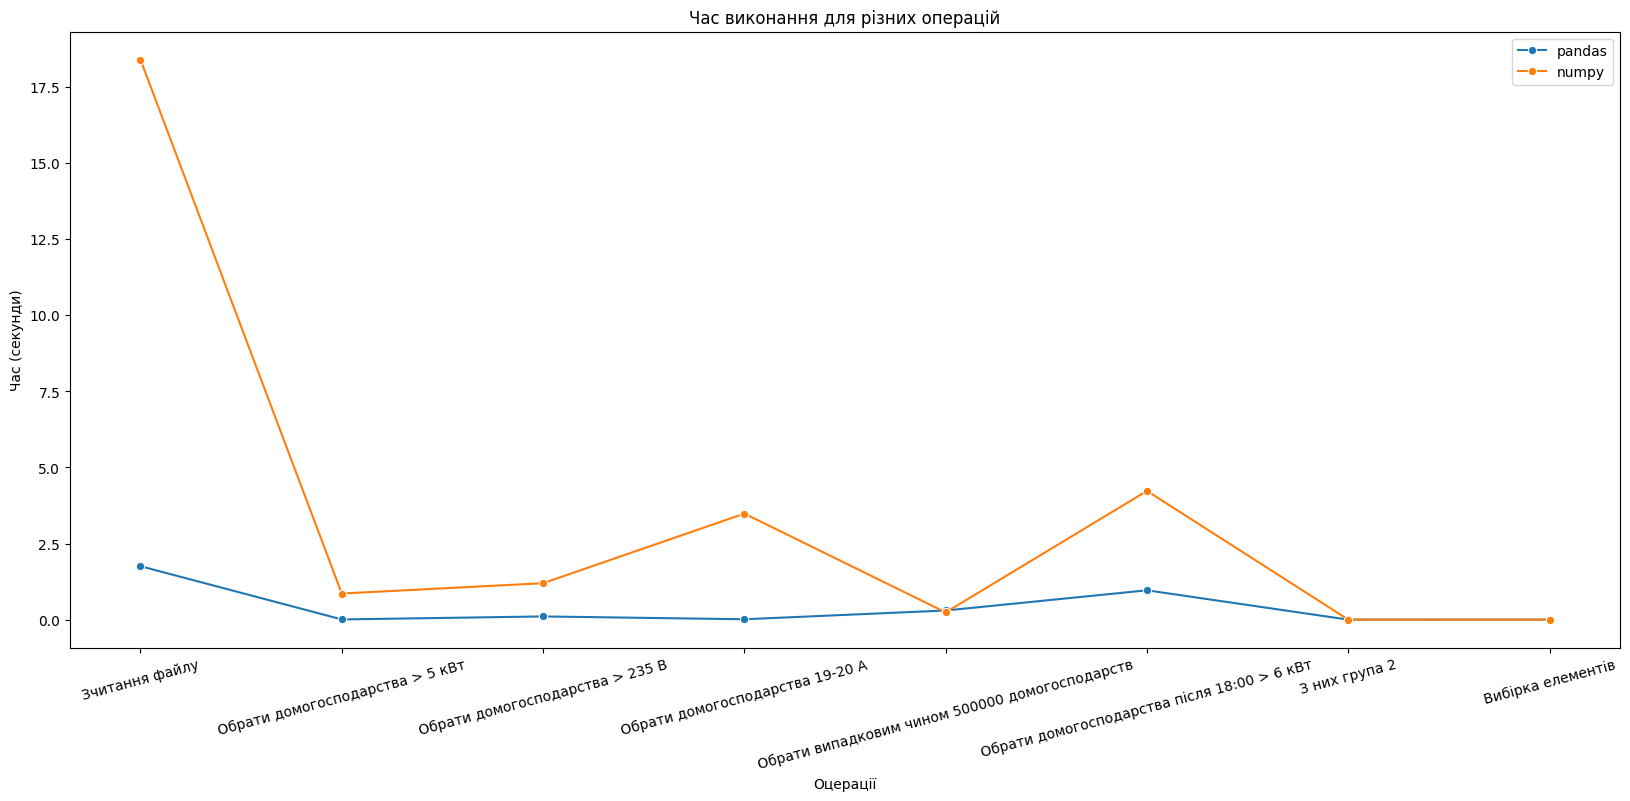

In [104]:
operations = ['Зчитання файлу', 'Обрати домогосподарства > 5 кВт', 'Обрати домогосподарства > 235 В', 'Обрати домогосподарства 19-20 А', 'Обрати випадковим чином 500000 домогосподарств', 'Обрати домогосподарства після 18:00 > 6 кВт', 'З них група 2', 'Вибірка елементів']

plt.figure(figsize=(20, 8))

sns.lineplot(x=operations, y=list_time_pd, marker='o', label='pandas')
sns.lineplot(x=operations, y=list_time_np, marker='o', label='numpy')
plt.xlabel('Оцерації')
plt.ylabel('Час (секунди)')
plt.title('Час виконання для різних операцій')
plt.legend()
plt.xticks(rotation=15)
plt.show()
